# Second part of the assignment

## *Comparing and contrasting Cao figures using Pandas*




![image](attachment:5032403c-4494-426c-8dbe-450095a82a4f.png)


- 10% A clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame [4], pitched as your classmates.


- 20% A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.

- 10% Appropriate plots and other visualisations to enhance your notebook for viewers

## Preliminaries:

In [1]:
import math #importing math
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import requests as rq #dealing with http requests
import re #importing the regular expression package
import datetime as dt #importing dates and times
import sklearn.neighbors as nei #predictive library (K-neighbour)
import seaborn as sns 
import urllib.request as urlrq #helping to import data

<br>

# Introduction


***

In this Jupyter Notebook, I will discuss the Pandas package for Python and its basic uses. I will then examine the data from the official Cao website for last year, 2020 and 2019. From there, I will merge the data into one and compare the data points against each other. I will hope to display these in some of pythons graphs.

The notebook itself is broken down into a few different parts relating to the specific tasks outlined in the official assignment. A corresponding synopsis will be found in the README.

<br>

# The Pandas package 


***

Pandas was developed in 2008 and it was freely assessable to the public in 2019. It is built upon Numpy and is brilliant for data manipulation, analysis and cleaning your data. Some uses are slicing, merging and joining dataset, concatenating, indexing, column header overriding and data munging.

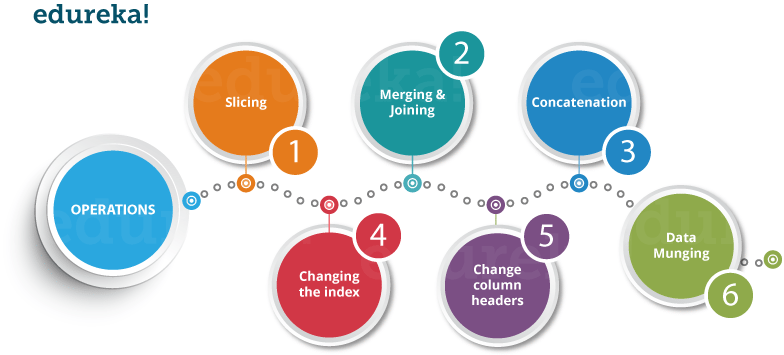

In [2]:
#cao_2021 = pd.read_excel('http://www2.cao.ie/points/l8.php') #Link for Cao points 2021

# Cao Points 2021

<br>

***

In [3]:
req = rq.get('http://www2.cao.ie/points/l8.php')

In [4]:
req #calling the req, 200 is considered as everything worked. 404 broken

<Response [200]>

In [5]:
#req.text #to view what has been imported from the html *taking up so much room so # out for awhile. 

In [6]:
#Taking this out for awhile

# for line in req.iter_lines(): #asking to iliterate through each line of the data set
    #print (line) #view

In [7]:
now = dt.datetime.now() #calling todays date and time Timestamp
print(now)

nowstring = now.strftime('%Y%m%d_%H%M%S') #formating as a string

2022-01-08 16:39:54.434181


In [8]:
path = 'data/cao2021_'+ nowstring + '.html' #creating a new path for original, so that we always have a copy of the original.

In [9]:
req.encoding #checking which encoding was used

'iso-8859-1'

In [10]:
original_encoding = req.encoding #as the server used the wrong encoding a new variable was created, original.

In [11]:
req.encoding = 'cp1252' #changing the encoding to cp1252

In [12]:
with open (path, 'w') as f:
    f.write(req.text)

In [13]:
re_course =re.compile(r'([A-Z]{2}[0-9]{3})(.*)([0-9]{3})(\*?) *') #compile regular expressions for matching lines

In [14]:
path = 'data/cao2021_csv'+ nowstring + '.csv' 

no_of_lines = 0

with open(path, 'w') as f:
    for line in req.iter_lines():
        dline = line.decode ('cp1252')
        if re_course.fullmatch(dline):
            no_of_lines = no_of_lines +1
            #csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            linesplit =re.split(' +' , dline)
            # print(','.join(linesplit))
            f.write(','.join(linesplit) +'\n')
            
            
    
print(f"Total number of lines produced: ", no_of_lines)


Total number of lines produced:  922


In [15]:
#df = pd.read_csv("http://www2.cao.ie/points/l8.php")

# Do checks to compare the 922 courses to what we have.

- I was able to locate a spreedsheet copy and chrome gave me the ability to download the Data into excel. In the real world, I would probably have saved the excel file and worked with that.

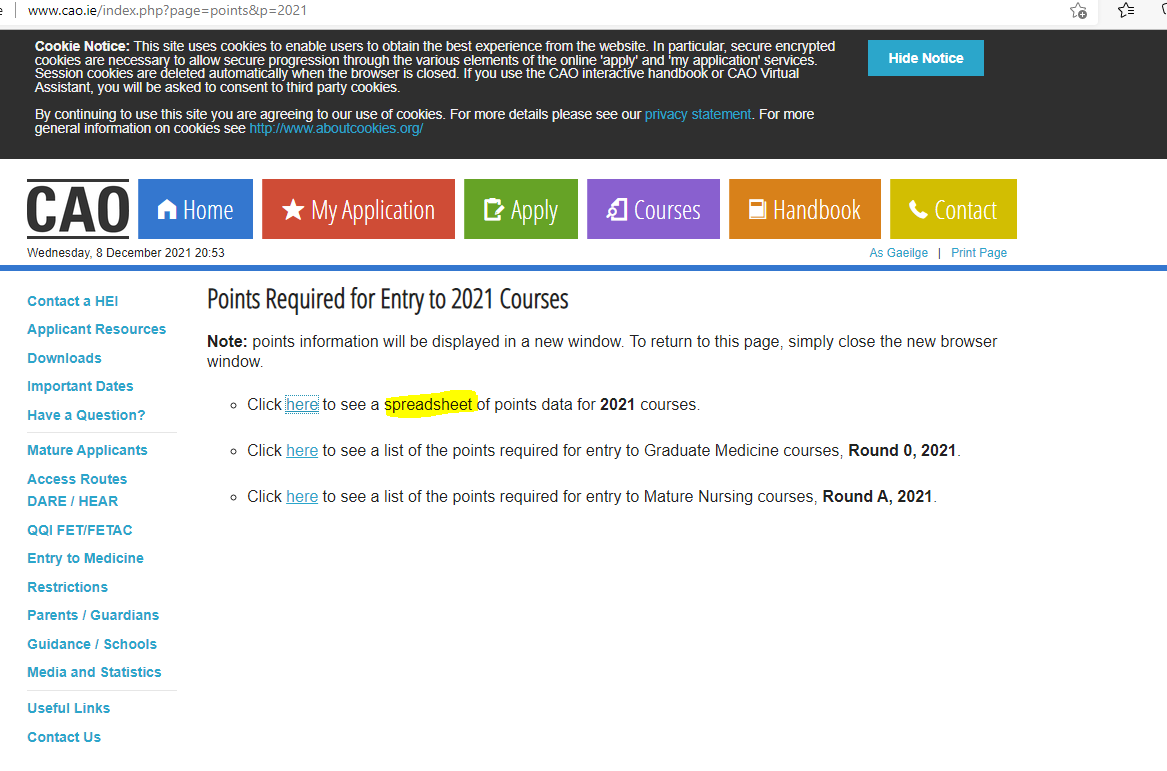

- So I quickly did a distict count on the level 8 course which produced 1034 courses. Therefore the numbers arent matching!

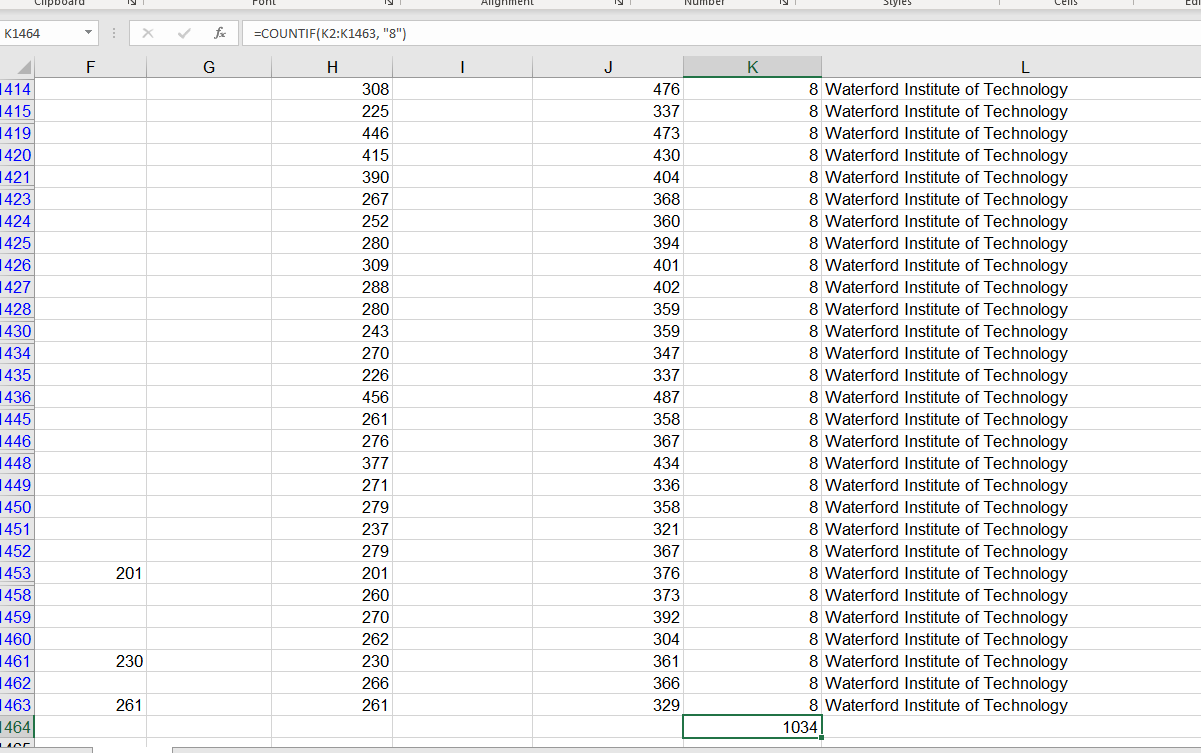



<br>

### So after leaving the assignment for a few days, I noticed that the CAO had updated their 2021 CAO points webpage and now you had the ability to use the data as an excel file.

***

In [16]:
path = 'data/cao2021_' + nowstring +' .xlsx' #creating a path for original excel sheet

In [17]:
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2021.xlsx", path)  #fetching the data from the url

('data/cao2021_20220108_163954 .xlsx',
 <http.client.HTTPMessage at 0x13c5e8a31f0>)

In [18]:
df2021= pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2021.xlsx",  skiprows =11) #creating the data frame, skipping the first few lines.

print(df2021.head()) #checkign the first few lines

         CATEGORY (ISCED Description)                     Course Title  \
0  Engineering and engineering trades  Music and Instrument Technology   
1                              Health              Pharmacy Technician   
2                              Health                   Dental Nursing   
3     Biological and related sciences                  Applied Science   
4         Business and administration                         Business   

  Course Code R1 Points R1 Random R2 Points  R2 Random EOS Points EOS Random  \
0       AL605       211       NaN        NaN       NaN        211        NaN   
1       AL630       308       NaN        NaN       NaN        308        NaN   
2       AL631       311       NaN        NaN       NaN        311        NaN   
3       AL632       297       NaN        NaN       NaN        297        NaN   
4       AL650       AQA       NaN        AQA       NaN        AQA        NaN   

  EOS Midpoints  Course Level                              HEI Test/Interv

In [19]:
df2021.head() #Checking the first few lines

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN


In [20]:
df2021 = df2021.drop(df2021.columns[[0,4,6,7,8,12,13,14]], axis=1) #removing the first column, last, column AVP, column Test, column R1 Random,column R2 Random, EOS Points, Ros Random. 

In [21]:
df2021 #checking the df again to see if the right columns were correctly removed.

,Course Title,Course Code,R1 Points,R2 Points,EOS Midpoints,Course Level,HEI
0,Music and Instrument Technology,AL605,211,NaN,319,6,Athlone Institute of Technology
1,Pharmacy Technician,AL630,308,NaN,409,6,Athlone Institute of Technology
2,Dental Nursing,AL631,311,NaN,400,6,Athlone Institute of Technology
3,Applied Science,AL632,297,NaN,454,6,Athlone Institute of Technology
4,Business,AL650,AQA,AQA,351,6,Athlone Institute of Technology
...,...,...,...,...,...,...,...
1446,Creative Computing,WD211,270,NaN,392,8,Waterford Institute of Technology
1447,Recreation and Sport Management,WD212,262,NaN,304,8,Waterford Institute of Technology
1448,Mechanical and Manufacturing Engineering,WD230,230,230,361,8,Waterford Institute of Technology
1449,Early Childhood Care and Education,WD231,266,NaN,366,8,Waterford Institute of Technology


In [22]:
df2021.iloc[-5] #random checks to compare against the excel sheet, which is correct

Course Title                    Creative Computing
Course Code                                  WD211
R1 Points                                      270
R2 Points                                      NaN
EOS Midpoints                                  392
Course Level                                     8
HEI              Waterford Institute of Technology
Name: 1446, dtype: object

<br>

### Comparing to the 2021 excel sheet: *5 places from the bottom* 

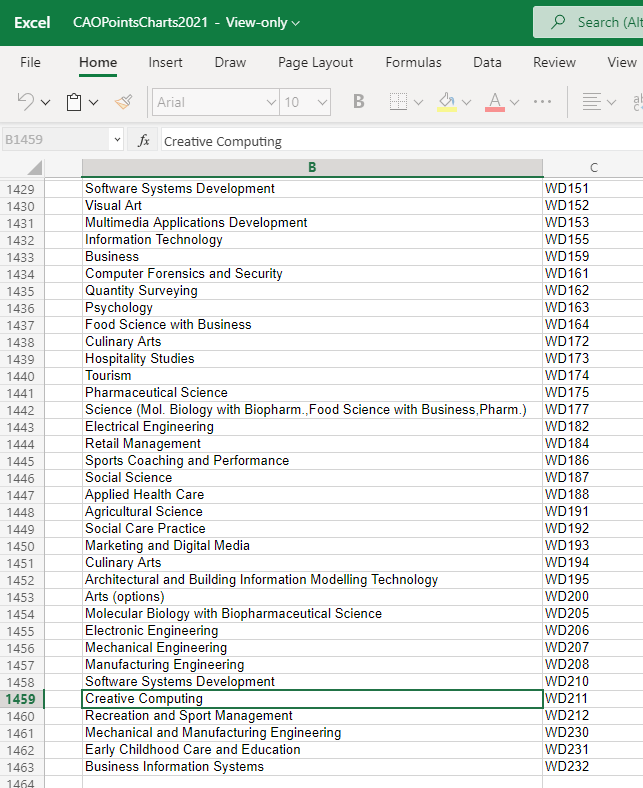 

<br>

In [23]:
df2021.iloc[100] #another check the other way.

Course Title                   Civil Engineering
Course Code                                CW478
R1 Points                                    465
R2 Points                                    NaN
EOS Midpoints                                465
Course Level                                   8
HEI              Institute of Technology, Carlow
Name: 100, dtype: object

<br>

### Comparing to the file again, *minus the first 10ish lines that we ignored while importing the file, plus the header this would be around the 113th line.

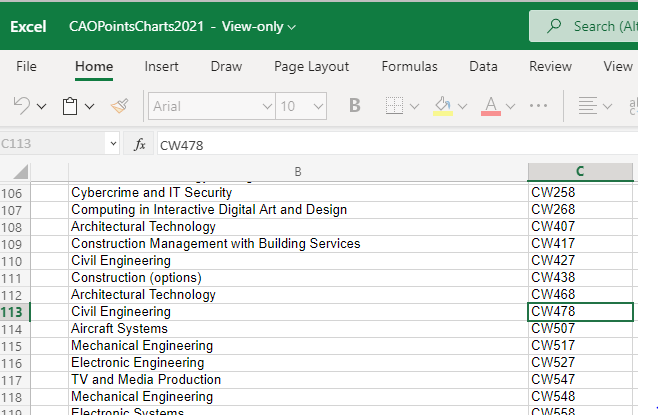

<br>

In [24]:
path = 'data/cao2021_' + nowstring + 'edited'+ ' .csv' #created a new path of the new 2021 Cao points dataset

In [25]:
df2021.to_csv(path)  #forced it into memory

<br>

### Steps completed on the Cao points 2021:

***

1.	After realising that the cao points for 2021, could be read in as an excel file I use this method as it seemed the most efficient way to display the 2021 data.
2.	I ensured the first few lines of the file would be ignored that included the preamble.
3.	I called a view of the newly formed data frame, to ensure everything was imported correctly.
4.	I removed all the columns that were deemed irrelevant and try to keep consistency across three dataframes (2021, 2020, 2019) I would end up using to do my analysis.
5.	 I carried out a few checks by looking at the data in notepad++ to see if they was anything missing or was out of the ordinary.
6.	Once placed and named as my *df2021*, I did some extra checks on the df by checking the 5th place from the bottom and the 100th place downwards from the top. These both gave the exact courses so I was confident in my data for 2021. 

<br>

# Cao Points 2020

<br>

***

In [26]:
path = 'data/cao2020_' + nowstring +' .xlsx' #creating a path for original excel sheet

In [27]:
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", path) 

('data/cao2020_20220108_163954 .xlsx',
 <http.client.HTTPMessage at 0x13c5e8543a0>)

In [28]:
df2020= pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", skiprows =10) #creating the data frame

print(df2020.head(3))

  CATEGORY (i.e.ISCED description)  \
0      Business and administration   
1    Humanities (except languages)   
2                             Arts   

                                       COURSE TITLE COURSE CODE2 R1 POINTS  \
0                            International Business        AC120       209   
1                                      Liberal Arts        AC137       252   
2  First Year Art & Design (Common Entry,portfolio)        AD101  #+matric   

  R1 Random * R2 POINTS R2 Random*       EOS EOS Random * EOS Mid-point  ...  \
0         NaN       NaN        NaN       209          NaN           280  ...   
1         NaN       NaN        NaN       252          NaN           270  ...   
2         NaN       NaN        NaN  #+matric          NaN      #+matric  ...   

   avp    v Column1 Column2 Column3  Column4  Column5  Column6  Column7  \
0  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN      NaN   
1  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN 

In [29]:
df2020 #looking holistical at the dateframe

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2020 = df2020.drop(df2020.columns[[0,4,6,7,8,12,13,14,15,16,17,18,19,20,21,22]], axis=1) #removing the unnecessary columns

In [31]:
df2020.describe() #getting another look at the df

,LEVEL
count,1464.000000
mean,7.639344
std,0.595939
min,6.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,8.000000


In [32]:
df2020.iloc[-2] #checking that the data was pulled incorrectly.

COURSE TITLE       Recreation and Sport Management
COURSE CODE2                                 WD212
R1 POINTS                                      270
R2 POINTS                                      NaN
EOS Mid-point                                  349
LEVEL                                            8
HEI              Waterford Institute of Technology
Name: 1462, dtype: object

In [33]:
df2020.iloc[73] #further checkes. 

COURSE TITLE     Education, Home Economics and Biology - with c...
COURSE CODE2                                                 AS001
R1 POINTS                                                      510
R2 POINTS                                                      NaN
EOS Mid-point                                                  544
LEVEL                                                            8
HEI                                           St. Angela`s College
Name: 73, dtype: object

In [34]:
path = 'data/cao2020_' + nowstring +' .csv' #creating new path for the new pandas df

In [35]:
df2020.to_csv(path) #save pandas df to disk

<br>

### Steps completed on the Cao points 2020:

***
1. Most of the steps carried out were similar to 2021 CAO data setup.
2. Alot more unecessary columns were removed from the dataset compared to the 2021 points.
3. Further checks were done on the course names and points. 

<br>

<br>

# Cao Points 2019


***

###### Steps to convert PDF to a readable file

1. Download original pdf file and saved it as a pdf
2. Opened the pdf file with word and saved it as a .docx
3. Saved a third copy and called it the edited version, this will allow me to edit the docx with altering the original. 
4. Deleted all headers and footers of the word doc.
5. Further deletion of the preamble
6. Copied data into notepad++
7. Delete all the college header names, this left blank lines.
8. Delete all blank lines ~ Edit -> Line Operations -> Remove Empty Lines
9. Ensure the delimiter is added (sep ='\t') for the file to be read in.
10. Replace double tab spaces with Find and replace and input single tab spaces *5 found
11. Removed blank spaces at the end of line 178 and at 266.
12. Find and Replace '#' and '*' with blank.
13. Save the file.


In [36]:
df2019 =pd.read_csv('data/cao2019_20211227_072908_edited.csv', sep='\t') #Link for the Cao points 2019

In [37]:
df2019 #the df itself

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


<br>

# Compairing the datasets


***

In [38]:
df2021

,Course Title,Course Code,R1 Points,R2 Points,EOS Midpoints,Course Level,HEI
0,Music and Instrument Technology,AL605,211,NaN,319,6,Athlone Institute of Technology
1,Pharmacy Technician,AL630,308,NaN,409,6,Athlone Institute of Technology
2,Dental Nursing,AL631,311,NaN,400,6,Athlone Institute of Technology
3,Applied Science,AL632,297,NaN,454,6,Athlone Institute of Technology
4,Business,AL650,AQA,AQA,351,6,Athlone Institute of Technology
...,...,...,...,...,...,...,...
1446,Creative Computing,WD211,270,NaN,392,8,Waterford Institute of Technology
1447,Recreation and Sport Management,WD212,262,NaN,304,8,Waterford Institute of Technology
1448,Mechanical and Manufacturing Engineering,WD230,230,230,361,8,Waterford Institute of Technology
1449,Early Childhood Care and Education,WD231,266,NaN,366,8,Waterford Institute of Technology


In [39]:
df2020

,COURSE TITLE,COURSE CODE2,R1 POINTS,R2 POINTS,EOS Mid-point,LEVEL,HEI
0,International Business,AC120,209,NaN,280,8,American College
1,Liberal Arts,AC137,252,NaN,270,8,American College
2,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,#+matric,8,National College of Art and Design
3,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,#+matric,8,National College of Art and Design
4,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,#+matric,8,National College of Art and Design
...,...,...,...,...,...,...,...
1459,Manufacturing Engineering,WD208,188,NaN,339,7,Waterford Institute of Technology
1460,Software Systems Development,WD210,279,NaN,337,8,Waterford Institute of Technology
1461,Creative Computing,WD211,271,NaN,318,8,Waterford Institute of Technology
1462,Recreation and Sport Management,WD212,270,NaN,349,8,Waterford Institute of Technology


In [40]:
df2019

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [41]:
df2019['Course Code'].isin(df2020['COURSE CODE2']).value_counts() #Checking how many courses in 2019 is the same as 2020

True     791
False    139
Name: Course Code, dtype: int64

In [42]:
df2019['Course Code'].isin(df2021['Course Code']).value_counts() #Checking how many courses in 2019 is the same as 2021

True     756
False    174
Name: Course Code, dtype: int64

In [43]:
df2021['Course Code'].isin(df2020['COURSE CODE2']).value_counts() #also comparing 2021 V 2020

True     1357
False      94
Name: Course Code, dtype: int64

<br>

# Merging of the dataframes


***

In [44]:
Courses2021 =df2021[['Course Code', 'Course Title']] #creating a new 2021 df with only two columms
Courses2021 #calling the newly created df

,Course Code,Course Title
0,AL605,Music and Instrument Technology
1,AL630,Pharmacy Technician
2,AL631,Dental Nursing
3,AL632,Applied Science
4,AL650,Business
...,...,...
1446,WD211,Creative Computing
1447,WD212,Recreation and Sport Management
1448,WD230,Mechanical and Manufacturing Engineering
1449,WD231,Early Childhood Care and Education


In [45]:
Courses2020 =df2020[['COURSE CODE2', 'COURSE TITLE']] #creating a new 2020 df with only two columms
Courses2020.columns = ['Course Code', 'Course Title'] #renaming the columns which will help merge the dfs
Courses2020

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [46]:
Courses2019 =df2019[['Course Code', 'COURSE']] #creating a new 2019 df with only two columms
Courses2019.columns = ['Course Code', 'Course Title'] #renaming the columns which will help merge the dfs
Courses2019

,Course Code,Course Title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [47]:
allcourses = pd.concat([ Courses2020,Courses2021, Courses2019], ignore_index=True) #concatating both df together
allcourses

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3840,WD200,Arts (options)
3841,WD210,Software Systems Development
3842,WD211,Creative Computing
3843,WD212,Recreation and Sport Management


In [48]:
allcourses.sort_values('Course Code') #looking at the duplicated values bY Course Code

,Course Code,Course Title
0,AC120,International Business
3083,AC120,International Business
1737,AC120,International Business
1,AC137,Liberal Arts
3084,AC137,Liberal Arts
...,...,...
2912,WD230,Mechanical and Manufacturing Engineering
1463,WD230,Mechanical and Manufacturing Engineering
3844,WD230,Mechanical and Manufacturing Engineering
2913,WD231,Early Childhood Care and Education


In [49]:
allcourses.iloc[0] #checking the dupes AC120

Course Code                      AC120
Course Title    International Business
Name: 0, dtype: object

In [50]:
allcourses.iloc[3083] 

Course Code                      AC120
Course Title    International Business
Name: 3083, dtype: object

In [51]:
allcourses.iloc[1737] #checking the dupes AC120

Course Code                      AC120
Course Title    International Business
Name: 1737, dtype: object

In [52]:
allcourses[allcourses.duplicated()] #looking at our duplicate records

,Course Code,Course Title
1464,AL605,Music and Instrument Technology
1465,AL630,Pharmacy Technician
1466,AL631,Dental Nursing
1467,AL632,Applied Science
1468,AL650,Business
...,...,...
3840,WD200,Arts (options)
3841,WD210,Software Systems Development
3842,WD211,Creative Computing
3843,WD212,Recreation and Sport Management


In [53]:
allcourses.drop_duplicates() #New clean df with all dupes dropped

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3783,TL801,Animation Visual Effects and Motion Design
3784,TL802,"TV, Radio and New Media"
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


In [54]:
allcourses.drop_duplicates(subset=['Course Code'], inplace=True) #Dropped the duplicated based on Course code only.

In [55]:
allcourses #calling the main dataframe

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3774,SG441,Environmental Science
3779,SG446,Applied Archaeology
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


In [56]:
df2019.columns=['Course Code', 'Course Title', 'R1 Points 2019','R2 Points 2019'] #Renaming the column headers for 2019 to make life simpler later on

In [57]:
df2019 #ensuring it was completed

,Course Code,Course Title,R1 Points 2019,R2 Points 2019
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [58]:
allcourses #displaying the data

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3774,SG441,Environmental Science
3779,SG446,Applied Archaeology
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


In [59]:
allcourses.sort_values('Course Code') #looking at the duplicated values bY Course Code

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management
1463,WD230,Mechanical and Manufacturing Engineering
2913,WD231,Early Childhood Care and Education


In [60]:
allcourses[allcourses.duplicated(keep=False)] #ensuring no duplicates where left as this was an ongoing issue for me

,Course Code,Course Title


In [61]:
allcourses #all values for 2021,2020,2019

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3774,SG441,Environmental Science
3779,SG446,Applied Archaeology
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


<br>

# Adding our Round 1 Points

***

In [62]:
allcourses.set_index('Course Code', inplace=True) #Making the Course code as our Index values

In [63]:
allcourses #ensuring the index was completed

,Course Title
Course Code,
AC120,International Business
AC137,Liberal Arts
AD101,"First Year Art & Design (Common Entry,portfolio)"
AD102,Graphic Design and Moving Image Design (portfo...
AD103,Textile & Surface Design and Jewellery & Objec...
...,...
SG441,Environmental Science
SG446,Applied Archaeology
TL803,Music Technology


In [64]:
df2021_r1= df2021[['Course Code','Course Title' ,'R1 Points']] #creating a df with the course code and R1 points so we can join the course code with the index and add the R1 points for 2021 
df2021_r1.columns =['Course Code', 'Title','R1 Points 2021']

In [65]:
df2021_r1.set_index('Course Code', inplace=True) #enduring the course code is the index 

In [66]:
allcourses = allcourses.join(df2021_r1[['R1 Points 2021']]) #Join the main dataset with the R1 Points for 2021

In [67]:
allcourses.sort_values('Course Code') #sort by course code

,Course Title,R1 Points 2021
Course Code,,
AC120,International Business,294
AC137,Liberal Arts,271
AD101,"First Year Art & Design (Common Entry,portfolio)",554
AD102,Graphic Design and Moving Image Design (portfo...,538
AD103,Textile & Surface Design and Jewellery & Objec...,505
...,...,...
WD211,Creative Computing,270
WD212,Recreation and Sport Management,262
WD230,Mechanical and Manufacturing Engineering,230


In [68]:
df2020_r1= df2020[['COURSE CODE2','COURSE TITLE' ,'R1 POINTS']] #creating a df with the course code and R1 points so we can join the course code with the index and add the R1 points for 2020 
df2020_r1.columns =['Course Code', 'Title','R1 Points 2020']

In [69]:
df2020_r1.set_index('Course Code', inplace=True) #enduring the course code is the index 

In [70]:
allcourses = allcourses.join(df2020_r1[['R1 Points 2020']]) #Join the main dataset with the R1 Points for 2020

In [71]:
allcourses.sort_values('Course Code') #sort by course code

,Course Title,R1 Points 2021,R1 Points 2020
Course Code,,,
AC120,International Business,294,209
AC137,Liberal Arts,271,252
AD101,"First Year Art & Design (Common Entry,portfolio)",554,#+matric
AD102,Graphic Design and Moving Image Design (portfo...,538,#+matric
AD103,Textile & Surface Design and Jewellery & Objec...,505,#+matric
...,...,...,...
WD211,Creative Computing,270,271
WD212,Recreation and Sport Management,262,270
WD230,Mechanical and Manufacturing Engineering,230,253


In [72]:
df2019_r1= df2021[['Course Code','Course Title' ,'R1 Points']] #creating a df with the course code and R1 points so we can join the course code with the index and add the R1 points for 2021 
df2019_r1.columns =['Course Code', 'Title','R1 Points 2019']

In [73]:
df2019_r1.set_index('Course Code', inplace=True) #enduring the course code is the index 

In [74]:
allcourses = allcourses.join(df2019_r1[['R1 Points 2019']]) #Join the main dataset with the R1 Points for 2019

In [75]:
allcourses.sort_values('Course Code') #sort by course code

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
AC120,International Business,294,209,294
AC137,Liberal Arts,271,252,271
AD101,"First Year Art & Design (Common Entry,portfolio)",554,#+matric,554
AD102,Graphic Design and Moving Image Design (portfo...,538,#+matric,538
AD103,Textile & Surface Design and Jewellery & Objec...,505,#+matric,505
...,...,...,...,...
WD211,Creative Computing,270,271,270
WD212,Recreation and Sport Management,262,270,262
WD230,Mechanical and Manufacturing Engineering,230,253,230


<br>

# Comparing the Round 1 Cao Points for 2021, 2021 & 2019

***

In [76]:
allcourses.describe() #getting an idea of the new dataframe

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
count,1692,1416,1437,1416
unique,1040,415,389,415
top,Business,300,AQA,300
freq,30,22,26,22


In [77]:
allcourses.info() #another way of looking at the df

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, AC120 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Course Title    1692 non-null   object
 1   R1 Points 2021  1416 non-null   object
 2   R1 Points 2020  1437 non-null   object
 3   R1 Points 2019  1416 non-null   object
dtypes: object(4)
memory usage: 130.6+ KB


In [78]:
allcourses.isnull().values.any() #checking if we have null values

True

In [79]:
allcourses['R1 Points 2021'].equals(allcourses['R1 Points 2020']) #Checking if any points remained the same

False

In [80]:
allcourses['R1 Points 2020'].equals(allcourses['R1 Points 2019'])#Checking if any points remained the same

False

In [81]:
allcourses1 = allcourses.copy()

allcourses['Diff'] = np.where(allcourses['R1 Points 2021'] == allcourses['R1 Points 2020'] , '1', '0') #checking if there is a difference between the two years

In [82]:
print(allcourses1)

                                                  Course Title R1 Points 2021  \
Course Code                                                                     
AC120                                   International Business            294   
AC137                                             Liberal Arts            271   
AD101         First Year Art & Design (Common Entry,portfolio)            554   
AD102        Graphic Design and Moving Image Design (portfo...            538   
AD103        Textile & Surface Design and Jewellery & Objec...            505   
...                                                        ...            ...   
SG441                                    Environmental Science            NaN   
SG446                                      Applied Archaeology            NaN   
TL803                                         Music Technology            NaN   
TL812                             Computing with Digital Media            NaN   
WD148                       

In [83]:
allcourses.isnull().sum() #Counts of how many null values we have in the data set. 

Course Title        0
R1 Points 2021    276
R1 Points 2020    255
R1 Points 2019    276
Diff                0
dtype: int64

In [84]:
allcourses = allcourses.replace(regex = '([a-zA-Z])', value=0) #replacing all strings to 0

In [85]:
allcourses = allcourses.fillna(0) #Replacing all the NaNa with 0 

In [86]:
allcourses = allcourses.replace('#', 0) #replace # character to 0

In [87]:
allcourses['R1 Points 2021'].tolist() #Firstly the tolist was printing vertically
%pprint #this turns it off

Pretty printing has been turned OFF


In [88]:
allcourses['R1 Points 2021'].tolist() #I was able to see then the points for 2021 and check for anything wonderful

[294, 271, 554, 538, 505, 591, 514, 760, 413, 337, 738, 444, 0, 0, 0, 0, 211, 308, 311, 297, 0, 0, 0, 0, 207, 220, 211, 210, 250, 243, 238, 247, 226, 242, 242, 261, 421, 244, 251, 241, 223, 0, 642, 260, 300, 300, 313, 350, 321, 328, 0, 327, 451, 440, 346, 357, 324, 325, 346, 477, 338, 306, 309, 302, 336, 300, 309, 304, 301, 575, 747, 306, 484, 542, 464, 463, 378, 440, 440, 387, 0, 0, 0, 292, 290, 325, 300, 434, 339, 421, 312, 440, 367, 488, 409, 371, 464, 0, 0, 347, 544, 499, 399, 308, 473, 564, 500, 553, 455, 566, 465, 466, 423, 488, 507, 385, 445, 466, 332, 533, 545, 588, 589, 503, 555, 500, 543, 532, 566, 566, 465, 531, 506, 555, 463, 510, 543, 738, 625, 613, 601, 568, 500, 578, 498, 565, 455, 431, 509, 60, 508, 462, 513, 480, 382, 317, 292, 420, 272, 336, 351, 253, 172, 360, 343, 133, 212, 205, 227, 261, 270, 375, 297, 300, 320, 263, 315, 308, 256, 234, 443, 431, 434, 396, 336, 390, 365, 904, 1028, 0, 0, 0, 0, 525, 350, 450, 400, 435, 260, 260, 347, 590, 466, 425, 473, 327, 301, 26

In [89]:
allcourses=allcourses.replace('\#','',regex=True).astype(int)

In [90]:
allcourses['R1 Points 2021'].tolist() #I was able to see then the points for 2021 and check for anything wonderful

[294, 271, 554, 538, 505, 591, 514, 760, 413, 337, 738, 444, 0, 0, 0, 0, 211, 308, 311, 297, 0, 0, 0, 0, 207, 220, 211, 210, 250, 243, 238, 247, 226, 242, 242, 261, 421, 244, 251, 241, 223, 0, 642, 260, 300, 300, 313, 350, 321, 328, 0, 327, 451, 440, 346, 357, 324, 325, 346, 477, 338, 306, 309, 302, 336, 300, 309, 304, 301, 575, 747, 306, 484, 542, 464, 463, 378, 440, 440, 387, 0, 0, 0, 292, 290, 325, 300, 434, 339, 421, 312, 440, 367, 488, 409, 371, 464, 0, 0, 347, 544, 499, 399, 308, 473, 564, 500, 553, 455, 566, 465, 466, 423, 488, 507, 385, 445, 466, 332, 533, 545, 588, 589, 503, 555, 500, 543, 532, 566, 566, 465, 531, 506, 555, 463, 510, 543, 738, 625, 613, 601, 568, 500, 578, 498, 565, 455, 431, 509, 60, 508, 462, 513, 480, 382, 317, 292, 420, 272, 336, 351, 253, 172, 360, 343, 133, 212, 205, 227, 261, 270, 375, 297, 300, 320, 263, 315, 308, 256, 234, 443, 431, 434, 396, 336, 390, 365, 904, 1028, 0, 0, 0, 0, 525, 350, 450, 400, 435, 260, 260, 347, 590, 466, 425, 473, 327, 301, 26

In [91]:
allcourses['R1 Points 2020'].tolist() #check the points for 2020

[209, 252, 0, 0, 0, 0, 0, 0, 0, 377, 0, 0, 0, 0, 0, 0, 0, 295, 300, 234, 207, 0, 0, 0, 216, 214, 216, 204, 216, 223, 228, 252, 218, 214, 233, 250, 400, 244, 250, 241, 225, 208, 781, 260, 280, 303, 332, 337, 333, 319, 320, 308, 442, 387, 334, 351, 307, 325, 347, 430, 313, 306, 309, 295, 309, 302, 308, 304, 300, 578, 781, 307, 418, 510, 441, 440, 328, 408, 419, 336, 300, 309, 306, 310, 301, 311, 300, 412, 302, 368, 328, 401, 318, 452, 419, 330, 423, 0, 0, 336, 533, 466, 337, 308, 463, 510, 477, 509, 430, 556, 445, 420, 388, 402, 484, 397, 444, 462, 346, 507, 542, 540, 556, 468, 510, 467, 487, 485, 566, 554, 432, 510, 496, 518, 441, 487, 484, 731, 613, 590, 566, 520, 454, 542, 454, 533, 423, 419, 484, 57, 484, 0, 528, 494, 319, 327, 250, 361, 240, 321, 307, 255, 190, 346, 298, 100, 216, 208, 216, 248, 251, 308, 258, 260, 300, 261, 306, 266, 243, 255, 443, 411, 434, 394, 311, 361, 332, 868, 1088, 801, 838, 840, 841, 548, 335, 0, 0, 0, 282, 282, 297, 565, 398, 402, 420, 251, 261, 253, 397, 

In [92]:
allcourses['R1 Points 2019'].tolist() #Finally check the 2019

[294, 271, 554, 538, 505, 591, 514, 760, 413, 337, 738, 444, 0, 0, 0, 0, 211, 308, 311, 297, 0, 0, 0, 0, 207, 220, 211, 210, 250, 243, 238, 247, 226, 242, 242, 261, 421, 244, 251, 241, 223, 0, 642, 260, 300, 300, 313, 350, 321, 328, 0, 327, 451, 440, 346, 357, 324, 325, 346, 477, 338, 306, 309, 302, 336, 300, 309, 304, 301, 575, 747, 306, 484, 542, 464, 463, 378, 440, 440, 387, 0, 0, 0, 292, 290, 325, 300, 434, 339, 421, 312, 440, 367, 488, 409, 371, 464, 0, 0, 347, 544, 499, 399, 308, 473, 564, 500, 553, 455, 566, 465, 466, 423, 488, 507, 385, 445, 466, 332, 533, 545, 588, 589, 503, 555, 500, 543, 532, 566, 566, 465, 531, 506, 555, 463, 510, 543, 738, 625, 613, 601, 568, 500, 578, 498, 565, 455, 431, 509, 60, 508, 462, 513, 480, 382, 317, 292, 420, 272, 336, 351, 253, 172, 360, 343, 133, 212, 205, 227, 261, 270, 375, 297, 300, 320, 263, 315, 308, 256, 234, 443, 431, 434, 396, 336, 390, 365, 904, 1028, 0, 0, 0, 0, 525, 350, 450, 400, 435, 260, 260, 347, 590, 466, 425, 473, 327, 301, 26

array([[<AxesSubplot:title={'center':'Course Title'}>,
        <AxesSubplot:title={'center':'R1 Points 2021'}>],
       [<AxesSubplot:title={'center':'R1 Points 2020'}>,
        <AxesSubplot:title={'center':'R1 Points 2019'}>],
       [<AxesSubplot:title={'center':'Diff'}>, <AxesSubplot:>]],
      dtype=object)

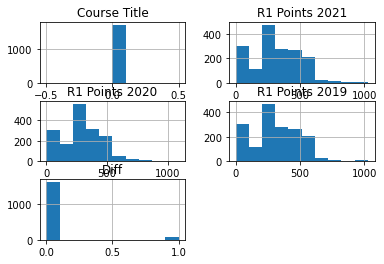

In [94]:
allcourses.hist() #comparing all the columns